In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
import seaborn as sns
import math
# Ignore sklearn warning for now
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
import os
os.getcwd()

'/mnt/3106DB277DCCEAA5/Sync/Research/Coding/medicine/gods21/experiments/london'

In [13]:
samples_summary = pd.read_csv('../../../../../../../OneDrive_2023-02-10/Data-for-Cambridge/Biochemical-data/KCL_biochemical_data_2023_01_24.csv', index_col=0).iloc[:-1]
samples_summary = samples_summary.sort_index()
samples_summary = samples_summary.drop_duplicates()
samples_summary

,ACTH,ALP,ALT,AST,Albumin,Bilirubin,Cholesterol,Cortisol,Free fatty acids,Gamma GT,Glucose,HDL,HbA1c,Insulin,LDL,T3,T4,TSH
study_ID,,,,,,,,,,,,,,,,,,
1002.0,14.0,81.0,18.0,22.0,4.2,0.409357,162.162162,16.056542,470.0,65.0,88.288288,54.137664,5.2,6.1,96.674401,2.734375,1.289821,2.34
1003.0,14.0,62.0,26.0,23.0,4.2,0.526316,158.301158,8.046394,NaN,10.0,95.495495,50.270688,5.3,11.0,NaN,2.994792,1.165501,0.14
1004.0,20.0,79.0,28.0,30.0,4.4,0.350877,185.328185,3.008336,510.0,15.0,93.693694,27.068832,5.4,18.5,NaN,3.190104,1.010101,4.21
1005.0,24.0,87.0,29.0,33.0,4.3,0.818713,158.301158,6.850308,440.0,25.0,NaN,54.137664,5.5,2.0,92.807425,3.059896,1.406371,4.66
1008.0,13.0,55.0,26.0,28.0,3.8,0.350877,189.189189,7.538963,90.0,22.0,79.279279,42.536736,5.1,20.3,123.743233,2.734375,1.421911,2.75
1009.0,39.0,214.0,21.0,26.0,4.7,0.409357,154.440154,14.896702,640.0,15.0,90.090090,58.004640,5.6,16.0,77.339520,4.231771,0.924631,2.82
1010.0,24.0,85.0,37.0,33.0,4.6,0.643275,154.440154,6.342878,490.0,17.0,70.270270,58.004640,5.2,2.0,85.073473,4.492188,2.090132,0.06
1011.0,39.0,116.0,57.0,32.0,4.3,0.292398,208.494208,8.372599,NaN,38.0,82.882883,61.871616,5.1,7.6,NaN,3.971354,1.934732,0.01
1012.0,24.0,99.0,95.0,40.0,4.3,0.233918,258.687259,9.206234,NaN,127.0,82.882883,46.403712,6.1,8.7,NaN,3.255208,1.188811,2.76


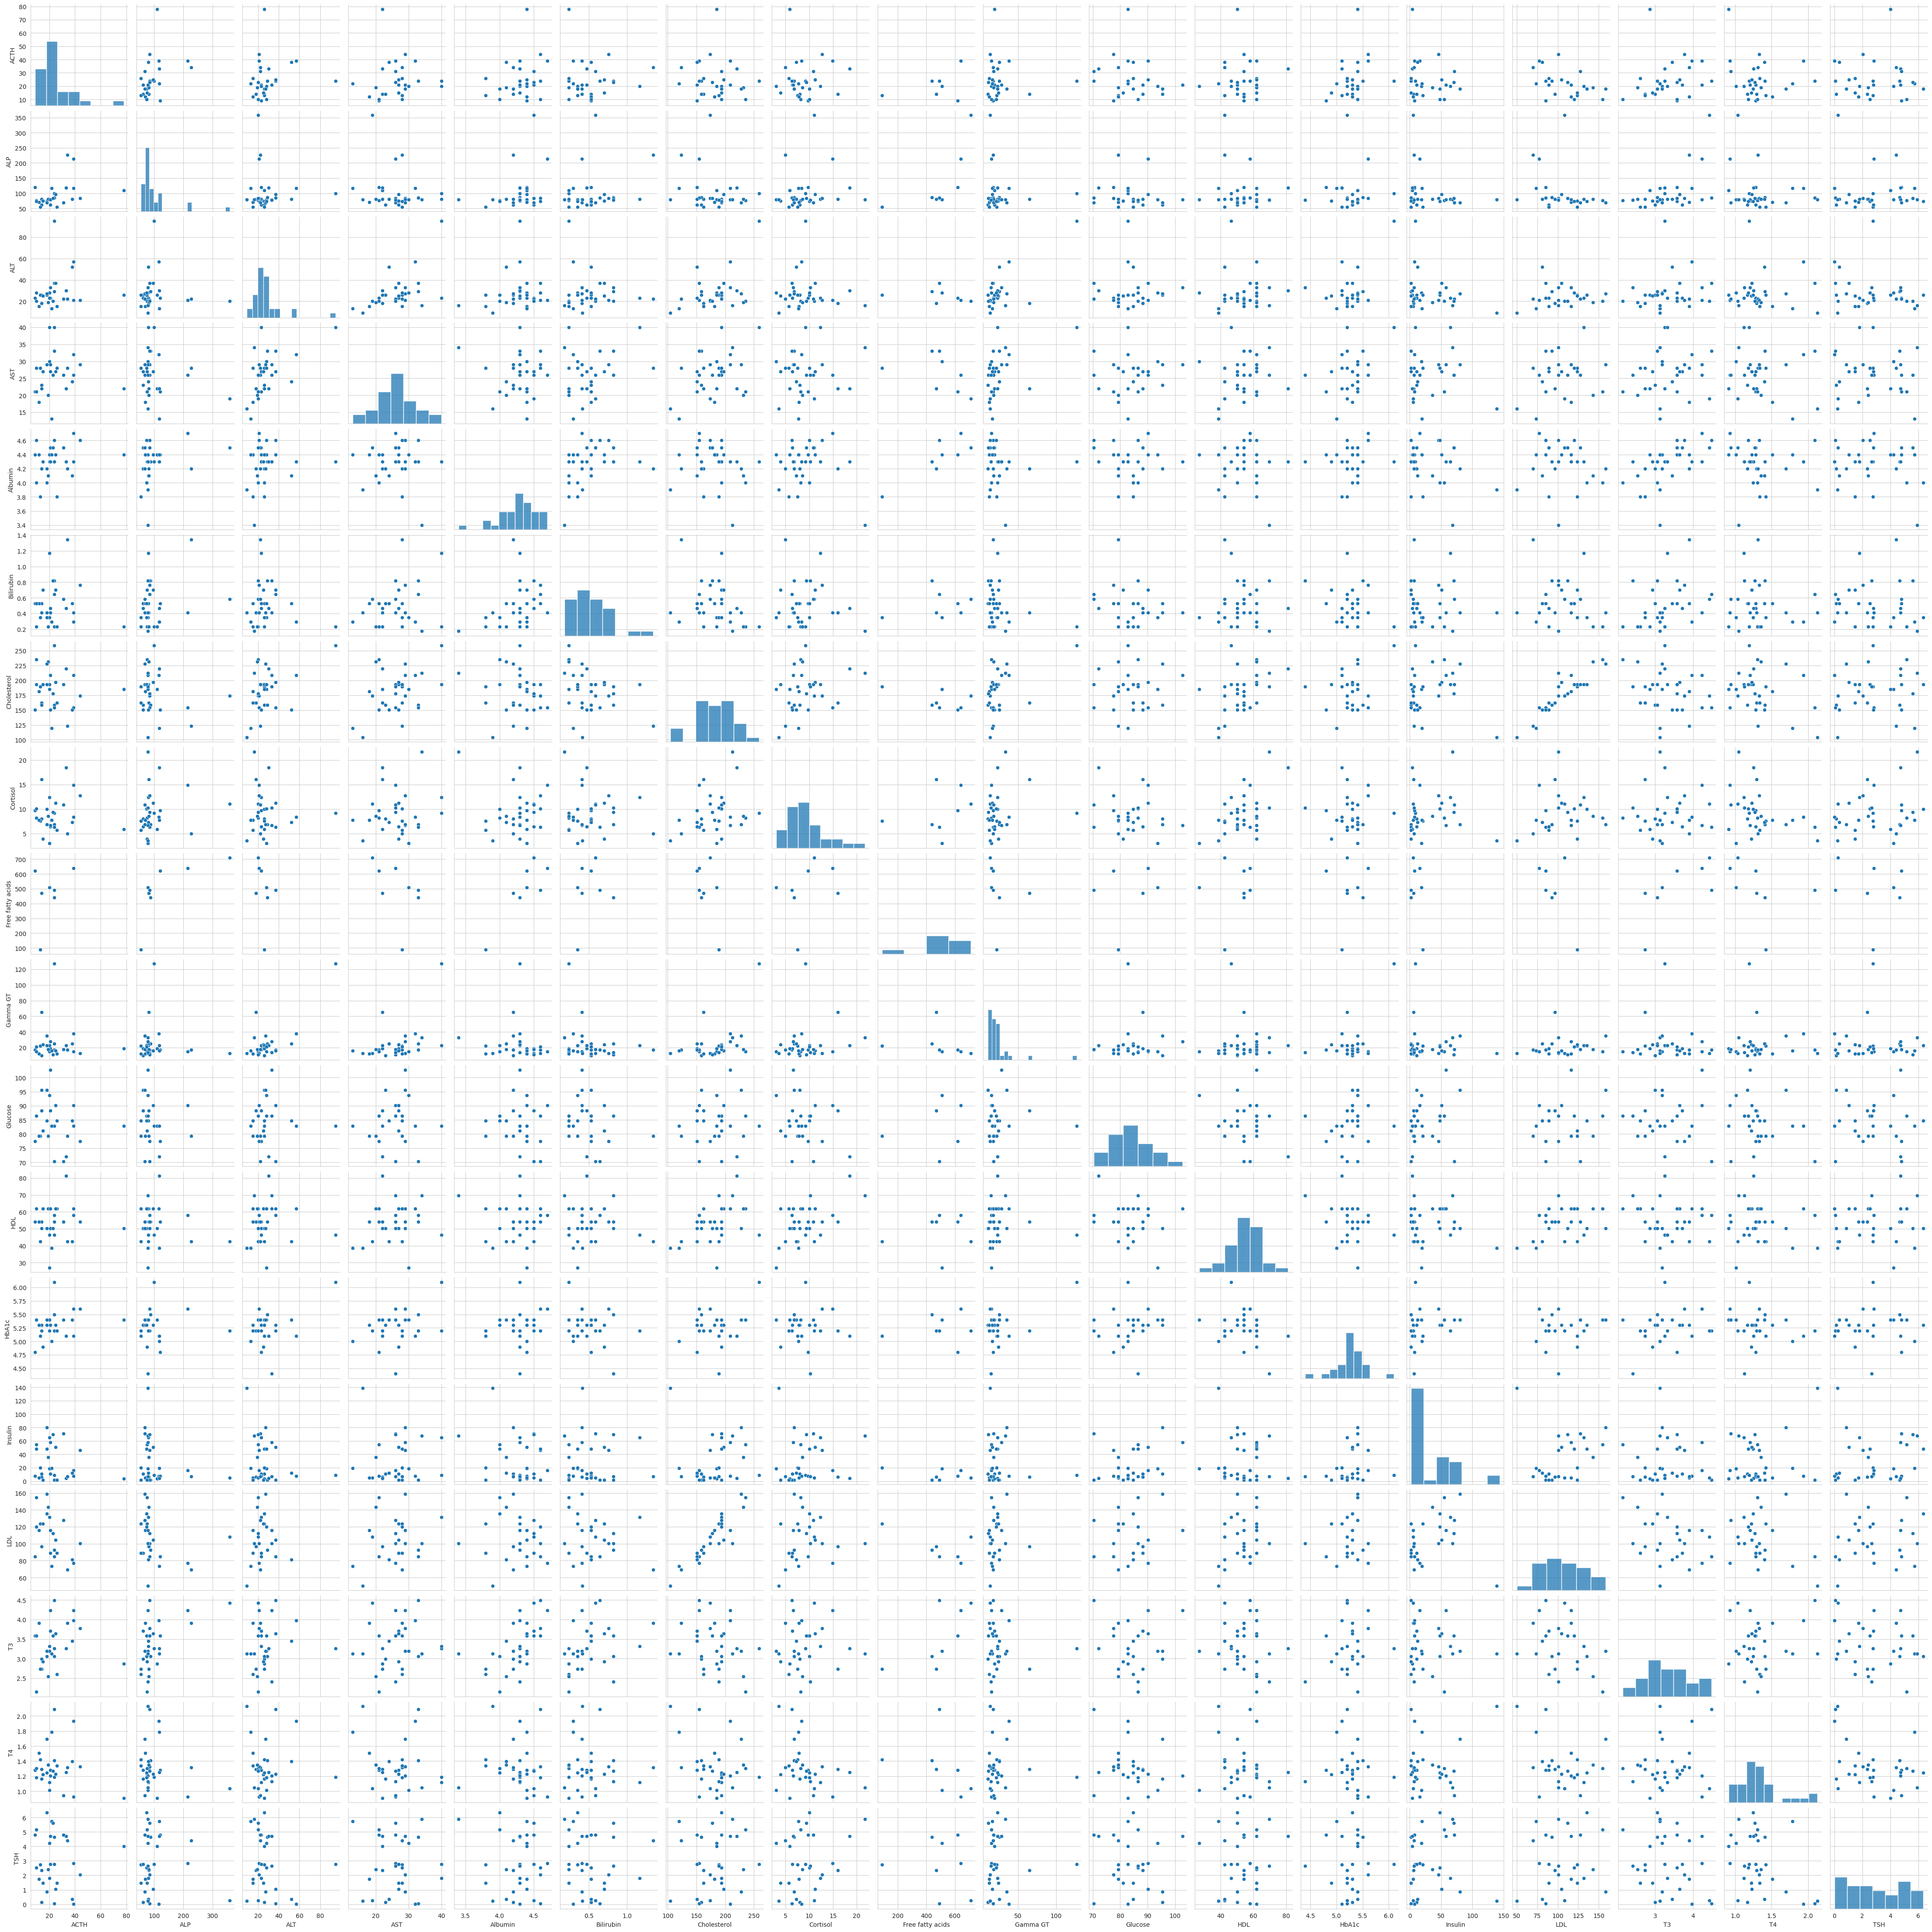

In [14]:
plt.figure()
sns.pairplot(samples_summary)
plt.show()

In [16]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(samples_summary), columns=samples_summary.columns)

In [17]:
rho2 = data_scaled.corr()
mask = np.triu(rho2)
np.fill_diagonal(mask, False)

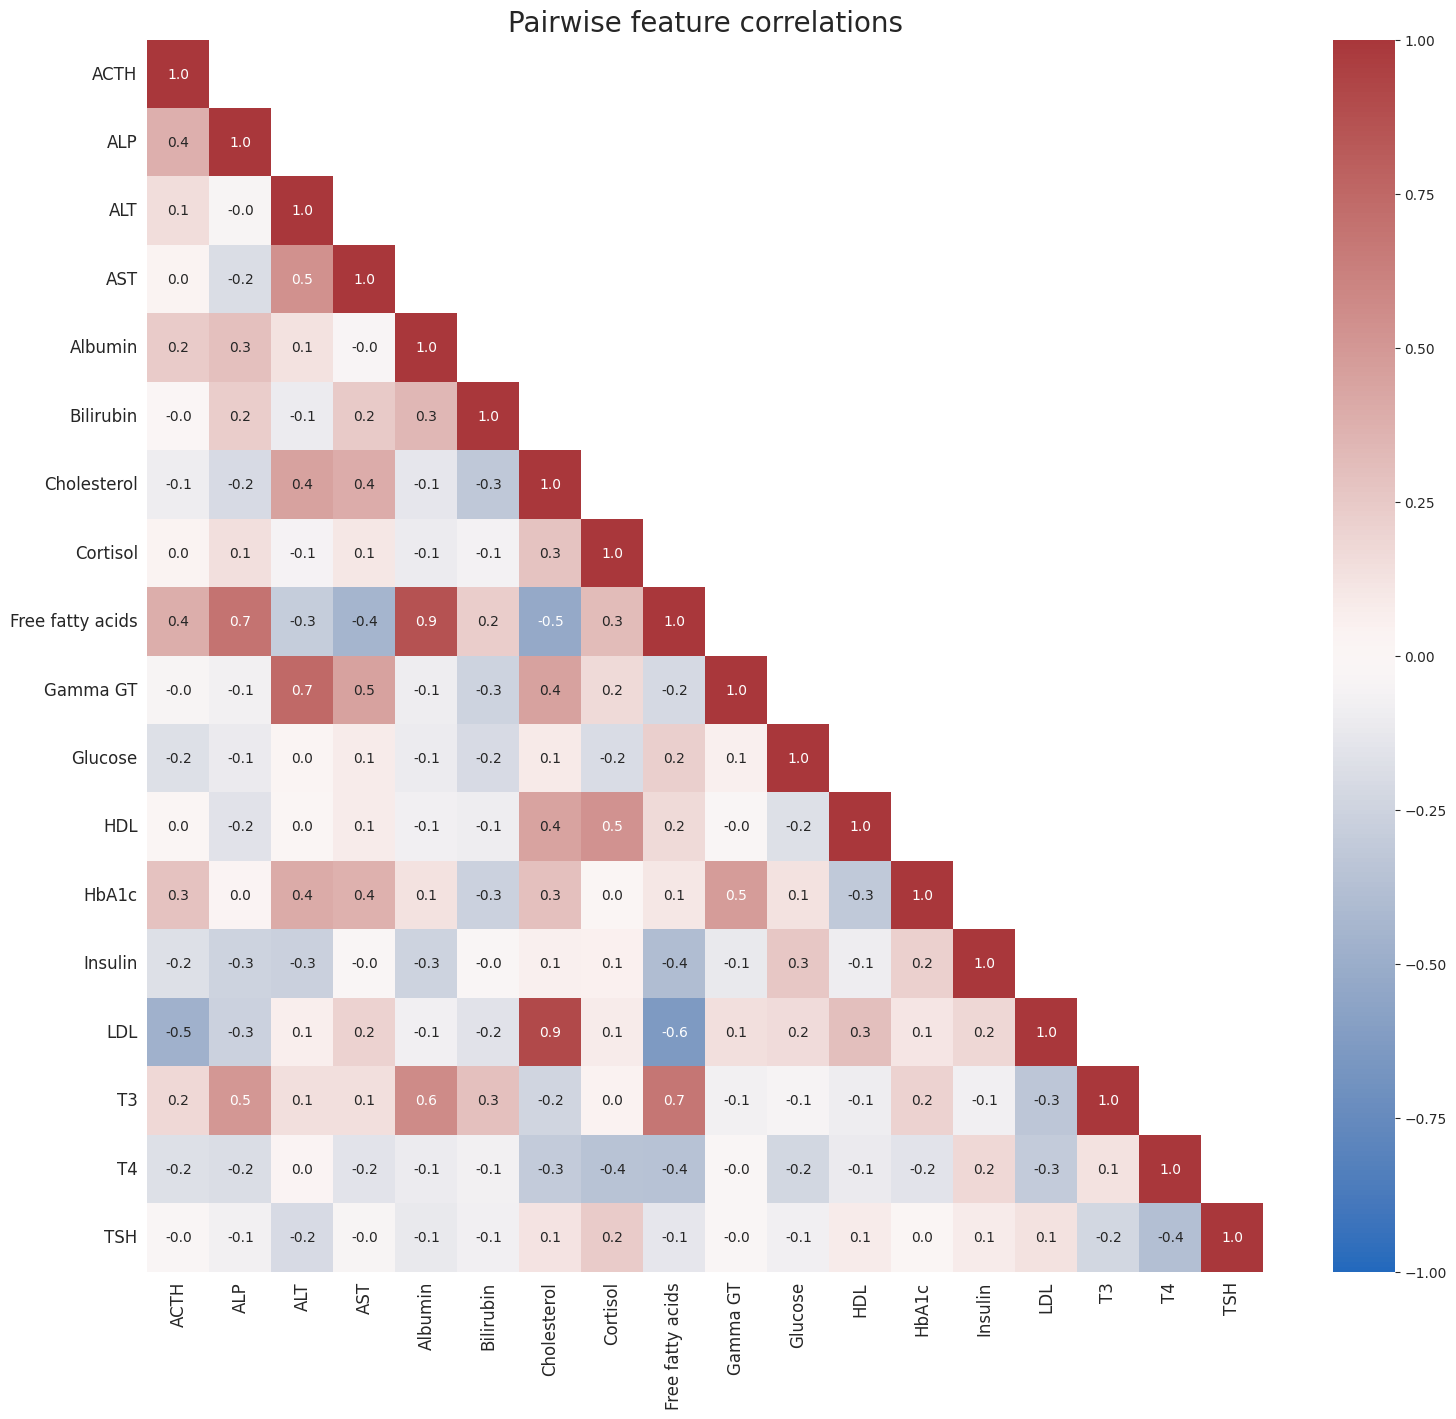

In [18]:
plt.figure(figsize=[18, 16])
plt.title("Pairwise feature correlations", fontsize=20)
sns.heatmap(rho2, mask=mask, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap='vlag')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig('correlation_matrix.png', dpi = 400, bbox_inches='tight')